<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t' , decimal='.' ) #читаем файл и выводим певые 5 строк
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info() #тип данных (is_apartment object вместо нужного bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Только 8 полных столбцов (без пропусков), удалить можем строки с пропусками в стобце "названия насеенного пункта", ведь если не ясно местоположение то и непонятно с чем сравнивать и впринципе непонятно где это.
Много столбцов с типом object которые нужно перевести в числовой тип.

## Предобработка данных

In [3]:
df.isna().sum() #Количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#удаляем строки с пропусками в столбце "местонахождение", это самый важный столбец
df = df.dropna(subset = ['locality_name']).reset_index()  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
index                   23650 non-null int64
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest   

In [5]:
#там где кол-во балконов не указано скорее всего их и нет - можем заменить пропуски нулем(как подсказали в описании проекта)
df['balcony'] = df['balcony'].fillna(0) 

In [6]:
#приводим к нижнему регистру текстовый солбец и не находим дубликатов
df['locality_name'].str.lower()
df.duplicated().sum()

0

In [7]:
#проверяем тип данных
print(df['balcony'].dtype,df['last_price'].dtype)

float64 float64


In [8]:
#переводим столбцы без пропусков в целочисленный  тип данных

df['balcony'] =  df['balcony'].astype('int')

df['last_price'] =  df['last_price'].astype('int')

#проверяем тип данных
print(df['balcony'].dtype,df['last_price'].dtype)

int64 int64


Столбец floors_total не удастся перевести в целочисленный тип из-за пропусков (а заменить их нулями как для балконов мы не можем, ведь это количество этажей), оставим его в типе float64

In [9]:
df.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Данные столбцы с пропусками для которых нет замены, поэтому пропуски в них мы оставляем

In [10]:
#переводим в тип int автомтически созданные столбцы



df['airports_nearest'].fillna(-1)
df['cityCenters_nearest'].fillna(-1)
df['parks_around3000'].fillna(-1)
df['parks_nearest'].fillna(-1)
df['ponds_around3000'].fillna(-1)
df['ponds_nearest'].fillna(-1)

df['airports_nearest'] = df['airports_nearest'].astype('Int64')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('Int64')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')

df.loc[df['airports_nearest'] < 0, 'airports_nearest'] = np.nan
df.loc[df['cityCenters_nearest'] < 0, 'cityCenters_nearest'] = np.nan
df.loc[df['parks_around3000'] < 0, 'parks_around3000'] = np.nan
df.loc[df['parks_nearest'] < 0, 'parks_nearest'] = np.nan
df.loc[df['ponds_around3000'] < 0, 'ponds_around3000'] = np.nan
df.loc[df['ponds_nearest'] < 0, 'ponds_nearest'] = np.nan

In [11]:
df.tail()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23645,23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN
23646,23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23647,23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23648,23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602.0
23649,23698,4,1350000,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Расчёты и добавление результатов в таблицу

In [12]:
#вычисляем и довавляем в таблицу цену квадратного метра

df['price_for_meter'] = df['last_price'] /df['total_area']
df.tail(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter
23645,23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN,72490.845228
23646,23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881
23647,23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758
23648,23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602.0,149511.400651
23649,23698,4,1350000,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635


In [13]:
#создаем столбцы с датой и отдельно днем недели, месяцем и годом

df['datetime_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
df['weekday'] =df['datetime_exposition'].dt.weekday
df['year'] = df['datetime_exposition'].dt.year
df['month'] = df['datetime_exposition'].dt.month

df.tail(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month
23645,23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN,72490.845228,2017-03-21,1,2017,3
23646,23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,2018-01-15,0,2018,1
23647,23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,2018-02-11,6,2018,2
23648,23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602.0,149511.400651,2017-03-28,1,2017,3
23649,23698,4,1350000,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,2017-07-21,4,2017,7


In [14]:
#категоризация этажей первый =0, последний =2, другой =1

def floor_group(row):
    last_floor = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return '0'
    if floor == last_floor:
        return '2'
    return '1'
df['floor_group'] = df.apply(floor_group, axis=1)
df['floor_group'] = pd.to_numeric(df['floor_group']).astype('float')
df.tail(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group
23645,23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN,72490.845228,2017-03-21,1,2017,3,1.0
23646,23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,2018-01-15,0,2018,1,1.0
23647,23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,2018-02-11,6,2018,2,0.0
23648,23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602.0,149511.400651,2017-03-28,1,2017,3,1.0
23649,23698,4,1350000,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,2017-07-21,4,2017,7,0.0


In [15]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей

df['living_area_for_total'] = df['living_area'] / df['total_area']
df['kitchen_area_for_total'] = df['kitchen_area']/ df['total_area']

In [16]:
df.tail(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total
23640,23689,13,3550000,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2,Санкт-Петербург,17284,16081,1,353,2,652,29.0,100566.572238,2018-02-28,2,2018,2,1.0,0.461756,0.257790
23641,23690,3,5500000,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,0,Санкт-Петербург,20151,6263,1,300,0,NaN,15.0,105769.230769,2018-07-19,3,2018,7,1.0,0.596154,0.115385
23642,23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424,4489,0,NaN,1,806,519.0,129903.978052,2016-10-13,3,2016,10,1.0,0.552812,0.145405
23643,23692,2,1350000,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,45000.000000,2017-07-07,4,2017,7,1.0,0.583333,0.200000
23644,23693,9,4600000,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0,Петергоф,45602,34104,1,352,1,675,239.0,73717.948718,2016-08-05,4,2016,8,1.0,0.641026,0.128205
23645,23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN,72490.845228,2017-03-21,1,2017,3,1.0,0.547792,0.103356
23646,23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,2018-01-15,0,2018,1,1.0,0.644068,0.144068
23647,23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,2018-02-11,6,2018,2,0.0,0.523810,NaN
23648,23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602.0,149511.400651,2017-03-28,1,2017,3,1.0,NaN,0.303583
23649,23698,4,1350000,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,2017-07-21,4,2017,7,0.0,0.380805,0.278638


In [17]:
df.head()


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total
0,0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,2019-03-07,3,2019,3,1.0,0.472222,0.231481
1,1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,82920.792079,2018-12-04,1,2018,12,0.0,0.460396,0.272277
2,2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286,2015-08-20,3,2015,8,1.0,0.612500,0.148214
3,3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176.100629,2015-07-24,4,2015,7,1.0,NaN,NaN
4,4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.000000,2018-06-19,1,2018,6,1.0,0.320000,0.410000


## Исследовательский анализ данных

In [18]:
#строим гистограммы для параметров: площадь(total_area), цена(last_price), число комнат(rooms), высота потолков(ceiling_height)
print('максимальная площадь:', df['total_area'].max().astype('int'))
print('максимальная цена:',df['last_price'].max())
print('максимальное число комнат:',df['rooms'].max())
print('максимальная выстота потолков:',df['ceiling_height'].max().astype('int'))
print('')
print('медианная площадь:', df['total_area'].median().astype('int'))
print('медианная цена:', df['last_price'].median().astype('int'))
print('медианное число комнат:', df['rooms'].median().astype('int'))
print('медианная выстота потолков:', df['ceiling_height'].median())
print('')
print('средняя площадь:', df['total_area'].mean().round(2))
print('средняя цена:', df['last_price'].mean().round(2))
print('средняя число комнат:', df['rooms'].mean().round(2))
print('средняя выстота потолков:', df['ceiling_height'].mean().round(2))

максимальная площадь: 900
максимальная цена: 763000000
максимальное число комнат: 19
максимальная выстота потолков: 100

медианная площадь: 52
медианная цена: 4650000
медианное число комнат: 2
медианная выстота потолков: 2.65

средняя площадь: 60.33
средняя цена: 6541126.9
средняя число комнат: 2.07
средняя выстота потолков: 2.77


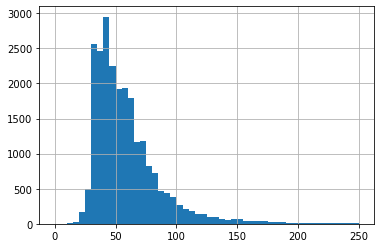

In [19]:
#гистограмма площади
df['total_area'].hist(bins=50, range=(0, 250))

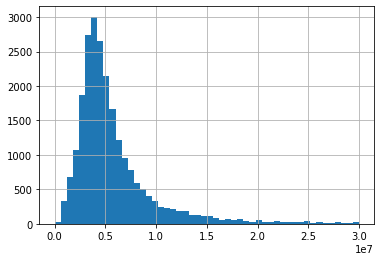

In [20]:
#гистограмма цены
df['last_price'].hist(bins=50, range=(0, 30000000))

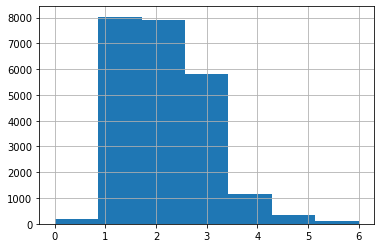

In [21]:
#гистограмма числа комнат
df['rooms'].hist(bins=7, range=(0, 6))

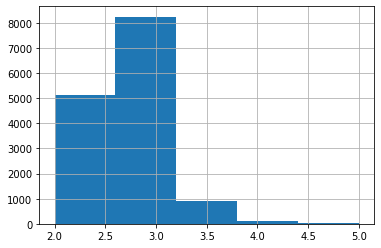

In [22]:
#гистограмма высоты полоков
df['ceiling_height'].hist(bins= 5, range=(2, 5))

In [23]:
#гистограмма времени продажи квартиры
df['days_exposition'] = pd.to_numeric(df['days_exposition']).astype('float') 
print('медианное время продажи:', df['days_exposition'].median().astype('int'),'дней')
print('среднее время продажи:', df['days_exposition'].mean().astype('int'), 'дней')

медианное время продажи: 95 дней
среднее время продажи: 180 дней


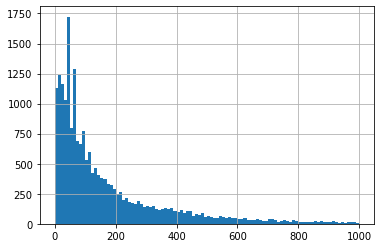

In [24]:
df['days_exposition'].hist(bins= 100, range=(0, 1000)) 

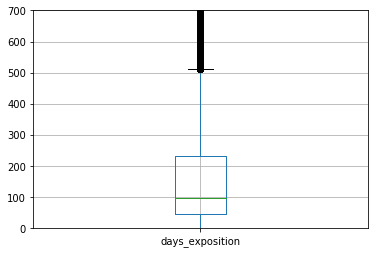

In [25]:
ax = df.boxplot(column='days_exposition')
ax.set_ylim(0, 700)
plt.show()
#из графика видно, что обычно продажа занимает от 45 до 231 дней
#если продажа прошла позже 500 дней, то это необычно долго
#а если продажа прошла раньше полутора дней, то это очень быстро

In [26]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

из графиков видно, что обычно продажа занимает от 45 до 231 дня, 
если продажа прошла позже 500 дней, то это необычно долго, 
а если продажа прошла раньше полутора дней, то это очень быстро

In [27]:
#уберем редкие и выбивающиеся значения 
df = df.query('(days_exposition < 600 or days_exposition.isna()) and 1<rooms<6 and 400000<last_price<20000000 and 20<total_area<150')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13711 entries, 0 to 23647
Data columns (total 31 columns):
index                     13711 non-null int64
total_images              13711 non-null int64
last_price                13711 non-null int64
total_area                13711 non-null float64
first_day_exposition      13711 non-null object
rooms                     13711 non-null int64
ceiling_height            8637 non-null float64
floors_total              13667 non-null float64
living_area               12629 non-null float64
floor                     13711 non-null int64
is_apartment              1603 non-null object
studio                    13711 non-null bool
open_plan                 13711 non-null bool
kitchen_area              12607 non-null float64
balcony                   13711 non-null int64
locality_name             13711 non-null object
airports_nearest          10601 non-null Int64
cityCenters_nearest       10613 non-null Int64
parks_around3000          10614 non-

0.7359615332729642

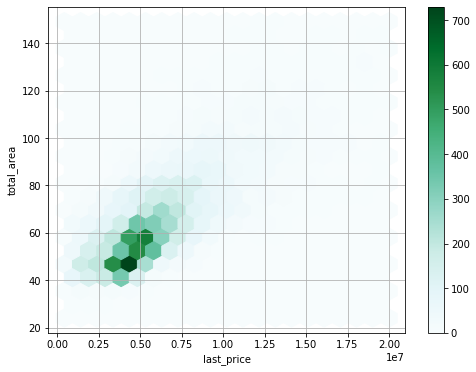

In [28]:
df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
df['last_price'].corr(df['total_area'])

#зависимость цены от площади есть и значительная

0.31614419756060264

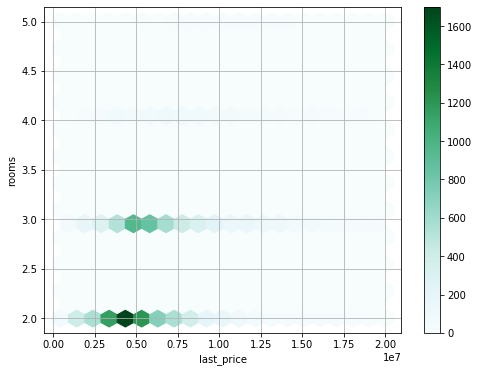

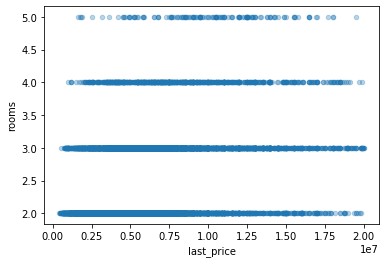

In [29]:
df.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
df.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
df['last_price'].corr(df['rooms'])

#зависимость цены от кол-ва комнат очень слабая, но прослеживается

,last_price,cityCenters_nearest
last_price,1.000000,-0.352784
cityCenters_nearest,-0.352784,1.000000


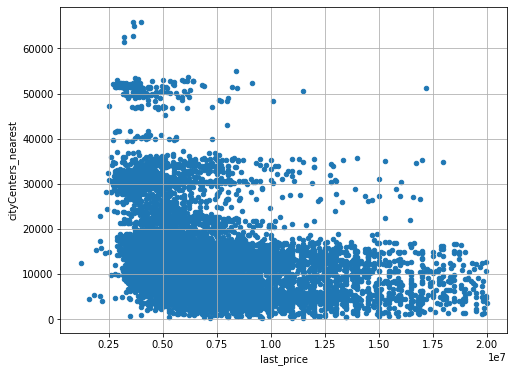

In [30]:
df.plot(x='last_price', y='cityCenters_nearest', kind='scatter',figsize=(8, 6), grid=True);
df[['last_price','cityCenters_nearest']].corr()


#зависимость цены от расстояния до центра есть, но слабая и обратная (чем больше число расстояния тем дешевле жилье)

ничего не менял, но начало выдавать ошибку

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13711 entries, 0 to 23647
Data columns (total 31 columns):
index                     13711 non-null int64
total_images              13711 non-null int64
last_price                13711 non-null int64
total_area                13711 non-null float64
first_day_exposition      13711 non-null object
rooms                     13711 non-null int64
ceiling_height            8637 non-null float64
floors_total              13667 non-null float64
living_area               12629 non-null float64
floor                     13711 non-null int64
is_apartment              1603 non-null object
studio                    13711 non-null bool
open_plan                 13711 non-null bool
kitchen_area              12607 non-null float64
balcony                   13711 non-null int64
locality_name             13711 non-null object
airports_nearest          10601 non-null Int64
cityCenters_nearest       10613 non-null Int64
parks_around3000          10614 non-

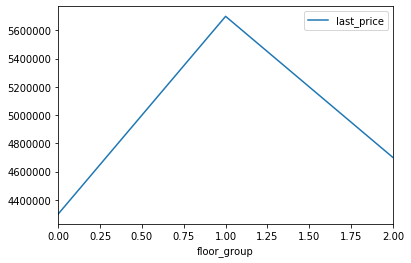

In [32]:
price_floor_group_med = df.pivot_table(index = 'floor_group',values = 'last_price', aggfunc = 'median')
price_floor_group_med.plot()
#зависимости цены от этажа

зависимости цены от этажа есть: на первых и последних этажах в среднем жилье дешевле чем на других (на послений долго добираться, а на первом шумно с улицы)

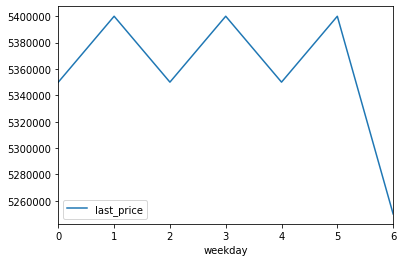

In [33]:
price_weekday_med = df.pivot_table(index = 'weekday',values = 'last_price', aggfunc = 'median')
price_weekday_med.plot()
#зависимость цены от дня недели публикации 

как ни странно есть зависимость цены от дня недели публикации: ниже всего в среднем цены у публикаций сделанных в воскресенье, в понедельник, среду и пятницу цена примерно одинаковая, а вот во вторник и четверг цены в среднем выше, причем одинаково выше.

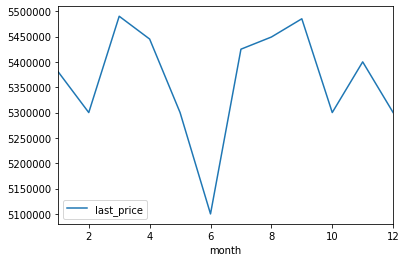

In [34]:
price_month_med = df.pivot_table(index = 'month',values = 'last_price', aggfunc = 'median')
price_month_med.plot()
#зависимость цены от месяца публикации 

зависимость цены от дня месяца публикации есть, видно что в июне в среднем цены на 5% ниже чем в остальнное время. 

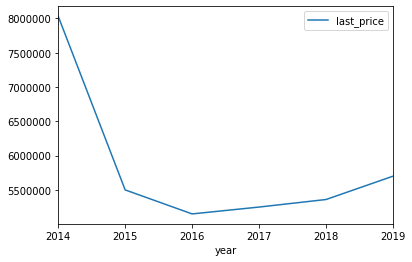

In [35]:
price_year_med = df.pivot_table(index = 'year',values = 'last_price', aggfunc = 'median')
price_year_med.plot()
#зависимость цены от года публикации нет

зависимость цены от года публикации  есть:с 2014 по 2016 год цены в среднем падали, а после 2016 до 2019 стали в среднем рости.

In [36]:
#Выбераем 10 населённых пунктов с наибольшим числом объявлений
locality_top10 = df['locality_name'].value_counts().head(10)
print(locality_top10)

Санкт-Петербург      9232
посёлок Шушары        247
Всеволожск            234
Колпино               226
Пушкин                206
Гатчина               197
посёлок Мурино        160
Выборг                159
посёлок Парголово     133
Петергоф              120
Name: locality_name, dtype: int64


In [37]:
#создаем новую таблицу 10 населённых пунктов с наибольшим числом объявлений
df_top10loc = df.query('locality_name in @locality_top10.index')
df_top10loc

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total
0,0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,2019-03-07,3,2019,3,1.0,0.472222,0.231481
2,2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286,2015-08-20,3,2015,8,1.0,0.612500,0.148214
4,4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.000000,2018-06-19,1,2018,6,1.0,0.320000,0.410000
7,7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN,110544.692737,2019-04-18,3,2019,4,1.0,NaN,0.263966
9,9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,88524.590164,2017-02-26,6,2017,2,1.0,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,23688,19,9200000,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,0,Санкт-Петербург,15632,14428,0,NaN,0,NaN,23.0,91089.108911,2019-04-01,0,2019,4,1.0,0.623762,0.148515
23641,23690,3,5500000,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,0,Санкт-Петербург,20151,6263,1,300,0,NaN,15.0,105769.230769,2018-07-19,3,2018,7,1.0,0.596154,0.115385
23642,23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424,4489,0,NaN,1,806,519.0,129903.978052,2016-10-13,3,2016,10,1.0,0.552812,0.145405
23644,23693,9,4600000,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0,Петергоф,45602,34104,1,352,1,675,239.0,73717.948718,2016-08-05,4,2016,8,1.0,0.641026,0.128205


In [38]:
#средняя цена квадратного метра в топ 10 нас. пунктах
df_top10loc_pivot_price = df_top10loc.pivot_table(index = 'locality_name',values = 'price_for_meter')
df_top10loc_pivot_price.sort_values(by ='price_for_meter',ascending = False)

,price_for_meter
locality_name,
Санкт-Петербург,105424.660450
Пушкин,100689.170599
посёлок Парголово,84395.192687
Петергоф,83592.312994
посёлок Мурино,77219.334622
посёлок Шушары,73965.084270
Колпино,71651.870102
Гатчина,67230.638193
Всеволожск,65699.410405


In [39]:
#топ 3 с самой высокой стоимостью жилья
df_top10loc_pivot_price.sort_values(by ='price_for_meter',ascending = False).head(3)

,price_for_meter
locality_name,
Санкт-Петербург,105424.660450
Пушкин,100689.170599
посёлок Парголово,84395.192687


In [40]:
#топ 3 с самой низкой стоимостью жилья
df_top10loc_pivot_price.sort_values(by ='price_for_meter',ascending = False).tail(3)

,price_for_meter
locality_name,
Гатчина,67230.638193
Всеволожск,65699.410405
Выборг,56424.581964


In [41]:
#выясняем, какая область входит в центр
#для начала выделяем квартиры в Санкт-Петербурге и создаем столбец с расстоянием до центра в километрах,
#округляем до целых значений

df_SPB = df.query('locality_name in ("Санкт-Петербург")')
df_SPB

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total
0,0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,2019-03-07,3,2019,3,1.0,0.472222,0.231481
2,2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286,2015-08-20,3,2015,8,1.0,0.612500,0.148214
4,4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.000000,2018-06-19,1,2018,6,1.0,0.320000,0.410000
7,7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN,110544.692737,2019-04-18,3,2019,4,1.0,NaN,0.263966
9,9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,88524.590164,2017-02-26,6,2017,2,1.0,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,23681,13,5250000,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,False,False,6.00,0,Санкт-Петербург,28323,7262,1,497,2,660,80.0,122093.023256,2018-05-11,4,2018,5,1.0,0.674419,0.139535
23639,23688,19,9200000,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,0,Санкт-Петербург,15632,14428,0,NaN,0,NaN,23.0,91089.108911,2019-04-01,0,2019,4,1.0,0.623762,0.148515
23641,23690,3,5500000,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,0,Санкт-Петербург,20151,6263,1,300,0,NaN,15.0,105769.230769,2018-07-19,3,2018,7,1.0,0.596154,0.115385
23642,23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424,4489,0,NaN,1,806,519.0,129903.978052,2016-10-13,3,2016,10,1.0,0.552812,0.145405


In [42]:
#и создаем столбец с расстоянием до центра в километрах, округляем до целых значений
df_SPB['dist_to_center'] = df_SPB['cityCenters_nearest']
df_SPB['dist_to_center'] = df_SPB['dist_to_center']/1000 
df_SPB['dist_to_center'] = df_SPB['dist_to_center'].round() 
df_SPB

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total,dist_to_center
0,0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,2019-03-07,3,2019,3,1.0,0.472222,0.231481,16.0
2,2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286,2015-08-20,3,2015,8,1.0,0.612500,0.148214,14.0
4,4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.000000,2018-06-19,1,2018,6,1.0,0.320000,0.410000,8.0
7,7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN,110544.692737,2019-04-18,3,2019,4,1.0,NaN,0.263966,12.0
9,9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,88524.590164,2017-02-26,6,2017,2,1.0,0.714754,0.106557,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,23681,13,5250000,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,False,False,6.00,0,Санкт-Петербург,28323,7262,1,497,2,660,80.0,122093.023256,2018-05-11,4,2018,5,1.0,0.674419,0.139535,7.0
23639,23688,19,9200000,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,0,Санкт-Петербург,15632,14428,0,NaN,0,NaN,23.0,91089.108911,2019-04-01,0,2019,4,1.0,0.623762,0.148515,14.0
23641,23690,3,5500000,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,0,Санкт-Петербург,20151,6263,1,300,0,NaN,15.0,105769.230769,2018-07-19,3,2018,7,1.0,0.596154,0.115385,6.0
23642,23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424,4489,0,NaN,1,806,519.0,129903.978052,2016-10-13,3,2016,10,1.0,0.552812,0.145405,4.0


In [43]:
#посчитаем среднюю цену для каждого километра с помощью сводной таблицы
price_for_km = df_SPB.pivot_table(index = 'dist_to_center',values = 'last_price')
price_for_km['last_price'] = price_for_km['last_price'].round().astype('int')
price_for_km

,last_price
dist_to_center,
0.0,9368000
1.0,10618120
2.0,9970032
3.0,9017416
4.0,9524947
5.0,9589446
6.0,8997919
7.0,8272629
8.0,8714977


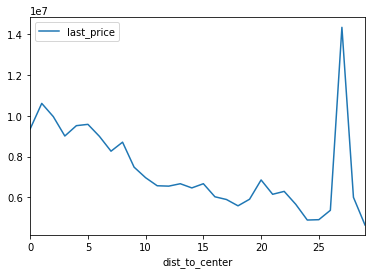

In [44]:
#Построим график: он должен показывать, как цена зависит от удалённости от центра
price_for_km.plot()

из графика видно что центр находится на расстоянии до 8 километров

In [45]:
#Выделим сегмент квартир в центре
center_spb = df_SPB.query('dist_to_center < 8.5')
center_spb

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total,dist_to_center
4,4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.000000,2018-06-19,1,2018,6,1.0,0.320000,0.410000,8.0
24,24,8,6500000,97.20,2015-10-31T00:00:00,2,NaN,3.0,46.5,1,NaN,False,False,19.60,0,Санкт-Петербург,20052,2336,3,411,3,124,265.0,66872.427984,2015-10-31,5,2015,10,0.0,0.478395,0.201646,2.0
99,99,32,9600000,90.00,2017-09-26T00:00:00,4,NaN,5.0,67.0,2,NaN,False,False,8.00,0,Санкт-Петербург,23277,2818,0,NaN,0,NaN,104.0,106666.666667,2017-09-26,1,2017,9,1.0,0.744444,0.088889,3.0
106,106,9,10500000,124.10,2017-05-25T00:00:00,5,3.20,4.0,79.4,3,NaN,False,False,20.00,0,Санкт-Петербург,26825,5527,1,384,0,NaN,6.0,84609.186140,2017-05-25,3,2017,5,1.0,0.639807,0.161160,6.0
136,136,16,6500000,51.80,2018-08-01T00:00:00,2,3.45,6.0,25.6,2,NaN,False,False,7.30,1,Санкт-Петербург,20502,3618,2,533,1,812,163.0,125482.625483,2018-08-01,2,2018,8,1.0,0.494208,0.140927,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23595,23644,7,4990000,62.50,2018-04-26T00:00:00,2,2.70,4.0,32.3,4,NaN,False,False,12.10,0,Санкт-Петербург,20141,4415,1,560,1,171,166.0,79840.000000,2018-04-26,3,2018,4,2.0,0.516800,0.193600,4.0
23632,23681,13,5250000,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,False,False,6.00,0,Санкт-Петербург,28323,7262,1,497,2,660,80.0,122093.023256,2018-05-11,4,2018,5,1.0,0.674419,0.139535,7.0
23641,23690,3,5500000,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,0,Санкт-Петербург,20151,6263,1,300,0,NaN,15.0,105769.230769,2018-07-19,3,2018,7,1.0,0.596154,0.115385,6.0
23642,23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424,4489,0,NaN,1,806,519.0,129903.978052,2016-10-13,3,2016,10,1.0,0.552812,0.145405,4.0


In [46]:
# изучаем и строим гистограммы для параметров: площадь(total_area), цена(last_price), число комнат(rooms), высота потолков(ceiling_height)
print('максимальная площадь:', center_spb['total_area'].max().astype('int'))
print('максимальная цена:',center_spb['last_price'].max())
print('максимальное число комнат:',center_spb['rooms'].max())
print('максимальная выстота потолков:',center_spb['ceiling_height'].max().astype('int'))
print('')
print('медианная площадь:', center_spb['total_area'].median())
print('медианная цена:', center_spb['last_price'].median().astype('int'))
print('медианное число комнат:', center_spb['rooms'].median().astype('int'))
print('медианная выстота потолков:', center_spb['ceiling_height'].median())
print('')
print('средняя площадь:', center_spb['total_area'].mean().round(2))
print('средняя цена:', center_spb['last_price'].mean().round(2))
print('средняя число комнат:', center_spb['rooms'].mean().round(2))
print('средняя выстота потолков:', center_spb['ceiling_height'].mean().round(2))

максимальная площадь: 149
максимальная цена: 19999000
максимальное число комнат: 5
максимальная выстота потолков: 32

медианная площадь: 75.0
медианная цена: 8500000
медианное число комнат: 3
медианная выстота потолков: 3.0

средняя площадь: 78.28
средняя цена: 9253199.19
средняя число комнат: 2.76
средняя выстота потолков: 3.07


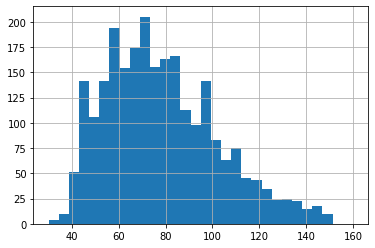

In [47]:
#гистограмма площади
center_spb['total_area'].hist(bins=30, range=(30, 160))

площадь в центре в среднем больше чем на окраине

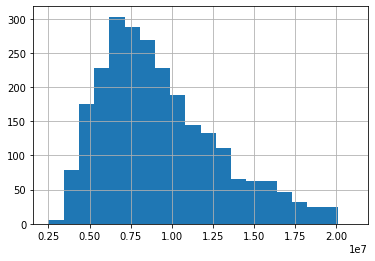

In [48]:
#гистограмма цены
center_spb['last_price'].hist(bins=20, range=(2500000, 21000000))

цены в центре довольно высокие: в среднем от 5 до 10 млн

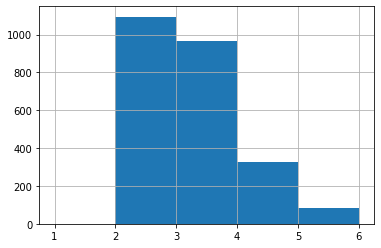

In [49]:
#гистограмма количества комнат
center_spb['rooms'].hist(bins=5, range=(1, 6))

количество комнат в центре от 2 до 5

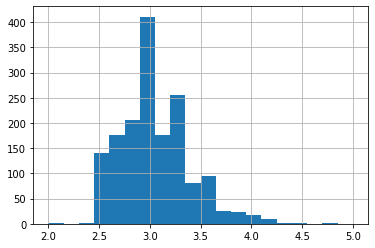

In [50]:
#гистограмма высоты потолков
center_spb['ceiling_height'].hist(bins=20, range=(2, 5))

потолки в центре выше

0.6711133350549713

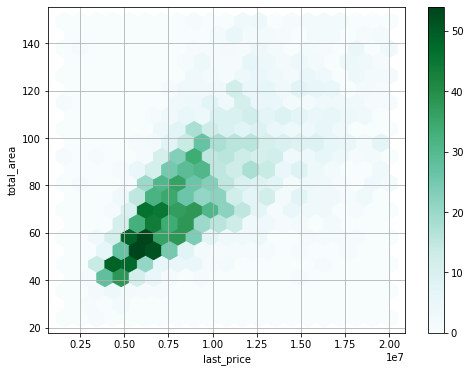

In [51]:
center_spb.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
center_spb['last_price'].corr(center_spb['total_area'])
#зависимость цены от площади есть и значительная

зависимость цены от площади почти не отличаются от общих значений по всему городу, однако в центре эта зависимость меньше

0.31458521552541285

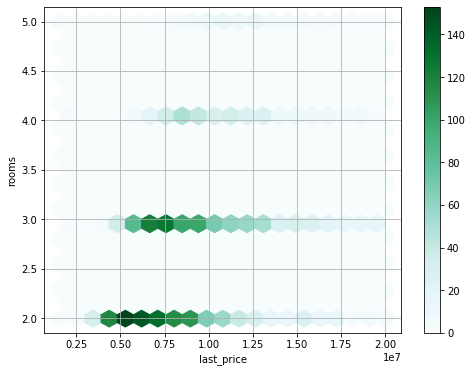

In [52]:
center_spb.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
center_spb['last_price'].corr(center_spb['rooms'])
#зависимость цены от кол-ва комнат очень слабая, но прослеживается

зависимость цены от кол-ва комнат абсолютно не отличаются от общих значений по всему городу

In [53]:
df.tail()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,datetime_exposition,weekday,year,month,floor_group,living_area_for_total,kitchen_area_for_total
23642,23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424,4489,0,NaN,1,806,519.0,129903.978052,2016-10-13,3,2016,10,1.0,0.552812,0.145405
23644,23693,9,4600000,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0,Петергоф,45602,34104,1,352,1,675,239.0,73717.948718,2016-08-05,4,2016,8,1.0,0.641026,0.128205
23645,23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN,72490.845228,2017-03-21,1,2017,3,1.0,0.547792,0.103356
23646,23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,2018-01-15,0,2018,1,1.0,0.644068,0.144068
23647,23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,2018-02-11,6,2018,2,0.0,0.523810,NaN


,last_price,cityCenters_nearest
last_price,1.000000,-0.120367
cityCenters_nearest,-0.120367,1.000000


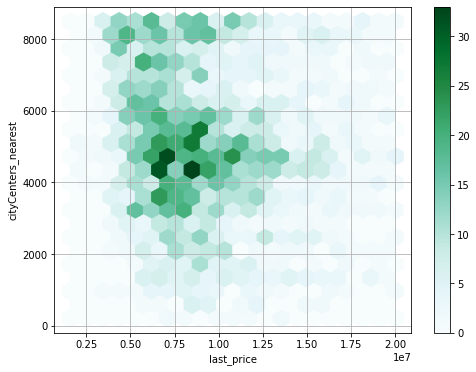

In [54]:
center_spb.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
center_spb[['last_price','cityCenters_nearest']].corr()

#зависимость цены от расстояния до центра есть, но слабая и обратная (чем больше число расстояния тем дешевле жилье)

зависимость цены от расстояния до центра сильно отличаются от общих значений по всему городу, тут эта зависимость в 3 раза ниже

Так как этой зависимости почти нет мы можем сделать вывод что правильно определили центр городоа

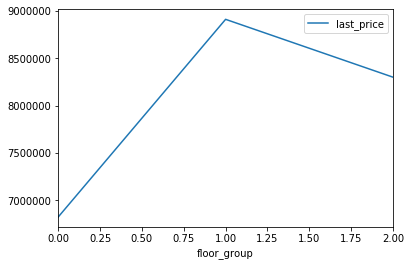

In [55]:
price_floor_group_med = center_spb.pivot_table(index = 'floor_group',values = 'last_price', aggfunc = 'median')
price_floor_group_med.plot()
#зависимость цены от этажа

зависимость цены от этажа есть, она отличается от значений по всему городу тем что на последних этажах в среднем не сильно дешевле жилье(либо низкие дома, либо в них есть лифты), а так же в абсолютном значении больше разница в цене жилья на первых и не на первых этажах.

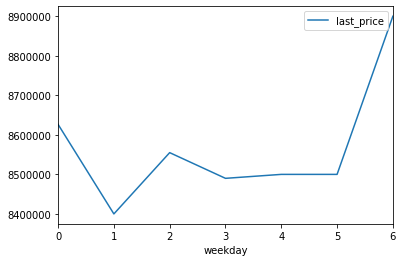

In [56]:
price_floor_group_med = center_spb.pivot_table(index = 'weekday',values = 'last_price', aggfunc = 'median')
price_floor_group_med.plot()
#зависимость цены от дня недели публикации 

зависимость цены от дня недели публикации есть, и она зеркально отличается от значений по всему городу: жилье опубликованное в понедельник и воскресенье в среднем дороже чем в остальные дни недели.

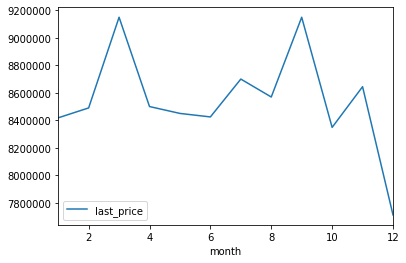

In [57]:
price_floor_group_med = center_spb.pivot_table(index = 'month',values = 'last_price', aggfunc = 'median')
price_floor_group_med.plot()
#зависимость цены от месяца публикации 

зависимость цены от месяца публикации есть, но не сильная, однако она сильно отличается от значений по всему городу: в декабре жилье продают дешевле всего и + в остальные месяцы в процентном соотношении разница не большая, а похожи эти зависимости тем что в сентябре жилье самое дорогое.

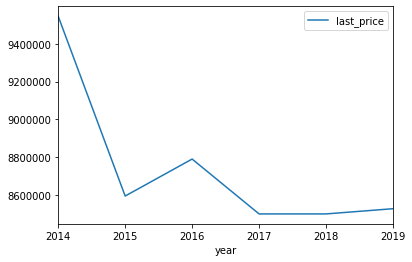

In [58]:
price_floor_group_med = center_spb.pivot_table(index = 'year',values = 'last_price', aggfunc = 'median')
price_floor_group_med.plot()
#зависимость цены от года публикации нет

зависимость цены от года публикации есть и отличается от значений по всему городу, тем что после падения в цене жилья в 2014-2016 годах его цена не стала расти, а укрепилась.

## Общий вывод

Общий вывод по предобработке данных можно сделать такой: много пропусков в автоматически созданных столбцах (расстояния до центра, водоема, парка и тд) значит нужно улучшать программу выдающую эти значения, заменить пропущенные значения мы смогли только в столбце с количеством балконов (в остальных столбцах мы оставили пропуски, но они нас не должны смущать),все числовые столбцы мы перевели в в типы int или float.

Общий вывод по расчетам и добавлению в таблицу можно сделать такой: мы добавили столбец с ценой квадратного метра; 4 столбца с датой, годом,месяцем и днем недели публикации; выделили столбец с категорией этажа (первый, последний, другой); создали столбцы с отношением кухни к общей плоди и жилой площади к общей.

Общий вывод по ислледовательскому анализу данных можно сделать такой: мы нашли зависимость цены от площади жилья; мы обнаружили достаточно слабую зависимость цены от числа комнат; так же цена жилья зависит от расстояния до центра города (зависимость видимая, но далеко не определяющая цену); мы узнали что цена никак не зависит от даты и времени публикации; в центре города квартиры сильно отличаются и в плане высоких цен, а так же высокими потолками и большей площадью жилья, в центре города зависимость цен отличается от всего города.